# Lab 6: Transformations and Linear Regression

## Objectives

- Use tranformations to linearize the data.
- Fit a linear regression model to the transformed data.
- Make a predictions using your model.

## Dataset

For this lab, we will be using synthetic data for house size (sq ft) and house price (thousands of dollars). You can download it [here](https://drive.google.com/uc?export=download&id=1LhiiA2_Rcu6DVqbMwMQY9Cfj92VFiJJ8). In the csv, there are 2 columns: `Size` and `Price`.

### 1. Load Data and Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('data.csv') # Your code here
print("First 5 rows of the generated data:")
print(data['Size'])
print(data['Price'])

First 5 rows of the generated data:
0     1347.930231
1     2507.146699
2     3635.544361
3     2642.351537
4     2060.411328
         ...     
95    1066.531035
96    1897.210709
97     634.019280
98    3710.665907
99    3796.071447
Name: Size, Length: 100, dtype: float64
0      2.368646
1      5.132354
2      7.982506
3      5.815469
4      3.595922
        ...    
95     1.795731
96     3.701511
97     1.342217
98     7.562981
99    11.732490
Name: Price, Length: 100, dtype: float64


### 2. Explore the Data

- Plot `Size` vs `Price`.

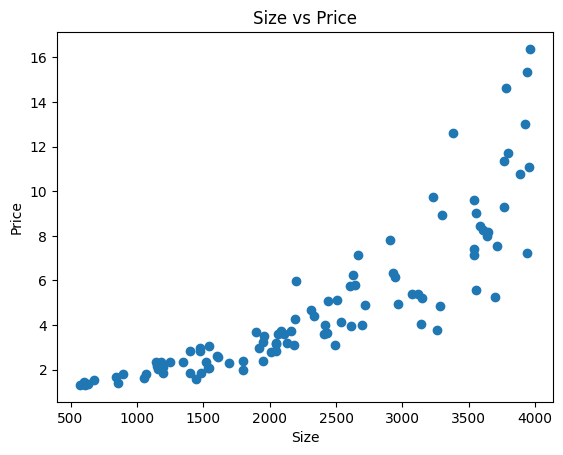

In [34]:
# Your code here

plt.scatter(data['Size'],data['Price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')

plt.show()

### 3. Transform the Data

- Find transformations to linearize the data.
- Apply transformations.
- Plot the transformed data.

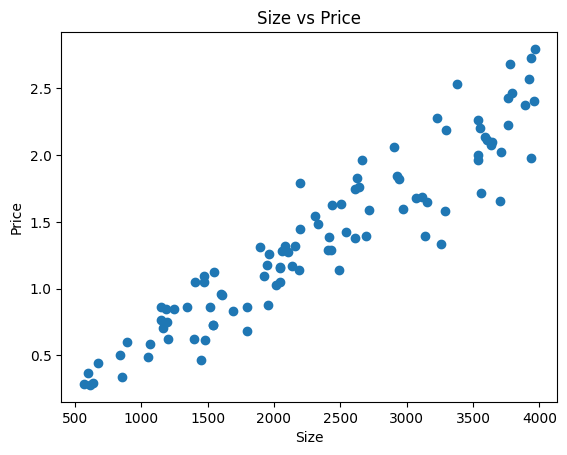

In [35]:
# Your code here
#Looks squared. Not logarithmic since logs funciton goes down
#Square root all y values to undo square function
#Attempted squared, cubed, forth root. All had too much variation. 
#Log root produces the most linear looking with least variation


#Sort of trial and error - best way to tell you have it correct is by looking for normal distribution
transformed_y = np.log(data['Price'])
plt.scatter(data['Size'],transformed_y)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')

plt.show()


### 4. Fit Linear Model

- Fit the regression model to transformed data.
- Report your obtained coefficients.

[0.776503   1.48399767 2.17268296 1.56651608 1.21134549 1.50437396
 1.27367958 1.28825272 1.29543593 0.89417171 1.82847692 0.93797729
 0.30064029 1.36392108 0.85709352 0.71500522 1.37650648 0.32682083
 0.89724843 0.32198068 1.25616496 0.88108478 1.24098781 0.65316795
 1.15018501 0.59783124 1.8762579  2.26117367 1.12684991 0.85368344
 1.04979208 2.17876446 1.29251325 2.37370925 1.43757894 0.47775373
 2.36912494 1.74092786 2.11483739 1.5986527  2.14371075 0.93261032
 2.32721225 2.15363342 0.80999599 1.86994568 1.95886766 1.92610353
 1.2034707  2.12447371 1.5453498  0.85483068 2.34887232 1.72696777
 1.18241105 0.36543592 1.42893484 2.21220209 1.61153592 0.5002079
 1.58116996 1.14616881 0.46712519 2.11272741 0.68642301 2.2518504
 0.83817491 2.01554156 1.76611173 0.68322711 0.80827715 0.89295776
 1.42365701 2.12427493 1.14397574 1.44116857 1.05171912 0.98688848
 1.20195341 1.47437555 1.22472864 2.25018385 1.96663219 1.85702889
 2.35590353 1.94361077 0.67677589 2.11248825 0.66248817 1.751369

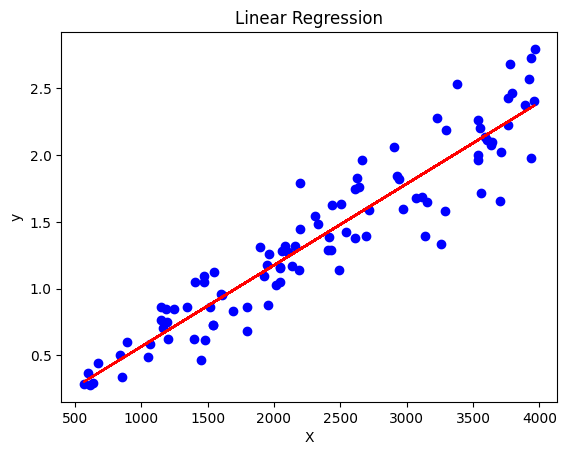

In [36]:
# Your code here
model = LinearRegression()
X = np.array(data['Size']).reshape(-1,1)

model.fit(X,transformed_y)
y_pred = model.predict(X)
print(y_pred)

plt.scatter(X, transformed_y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 5. Residuals

- Check the residuals for to verify that transformations were helpful by creating a plot with the residuals on the y-axis and the predicted values on the x-axis.

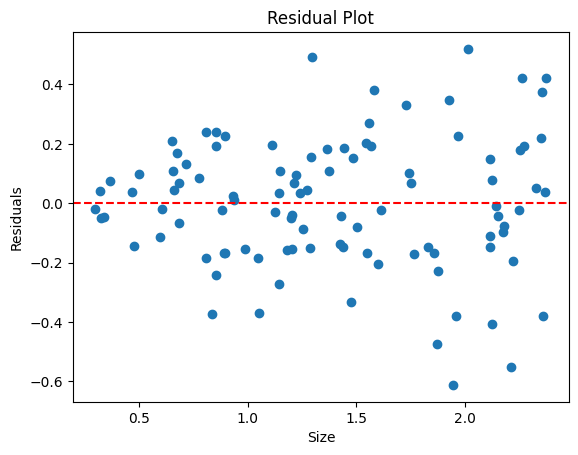

In [37]:
# Your code here
#Evaluate by checking distance!
#LIENAR RELATIONSHIP BETWEEN Y_PREDICTED AND SIZE - For fixed x the actual value of Y differs from its expected value by a random amount

#Positive residual indicates that the model underpredicted the actual value, while a negative residual means it overpredicted.
residuals = transformed_y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Size')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 6. Predict

- Predict the price for a 2500 sq ft house.
- Convert prediction back to original scale (it is currently in the transformed scale).

In [38]:
# Your code here
house_x = 2500
#we're looking for the y value, what is its price???

#Reshape x into a 2D array then use the fitted model to predict the value
house_x_array = np.array([[house_x]], )
estimated_price = model.predict(house_x_array)

print(estimated_price)

[1.47963588]


### 7. Submit Results

- Show your code cell outputs and your plots to the TA